In [4]:
# IBM HR Analytics: EDA + Data Cleaning Notebook

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# Load Data
df = pd.read_csv("/Users/shauryadityasingh/Downloads/HR Analytics/WA_Fn-UseC_-HR-Employee-Attrition.csv")

# Overview
print("Shape of dataset:", df.shape)
print("\nMissing values:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)
df.head()

Shape of dataset: (1470, 35)

Missing values:
 Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany         

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


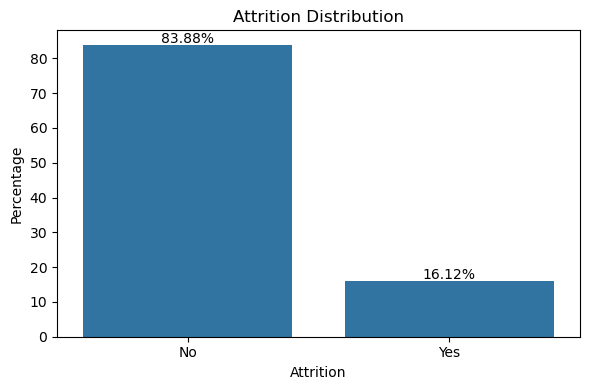

In [5]:
# Target Variable Distribution
attrition_counts = df['Attrition'].value_counts(normalize=True) * 100
plt.figure(figsize=(6,4))
sns.barplot(x=attrition_counts.index, y=attrition_counts.values)
plt.title('Attrition Distribution')
plt.ylabel('Percentage')
plt.xlabel('Attrition')
for i, v in enumerate(attrition_counts.values):
    plt.text(i, v + 0.5, f"{v:.2f}%", ha='center')
plt.tight_layout()
plt.show()

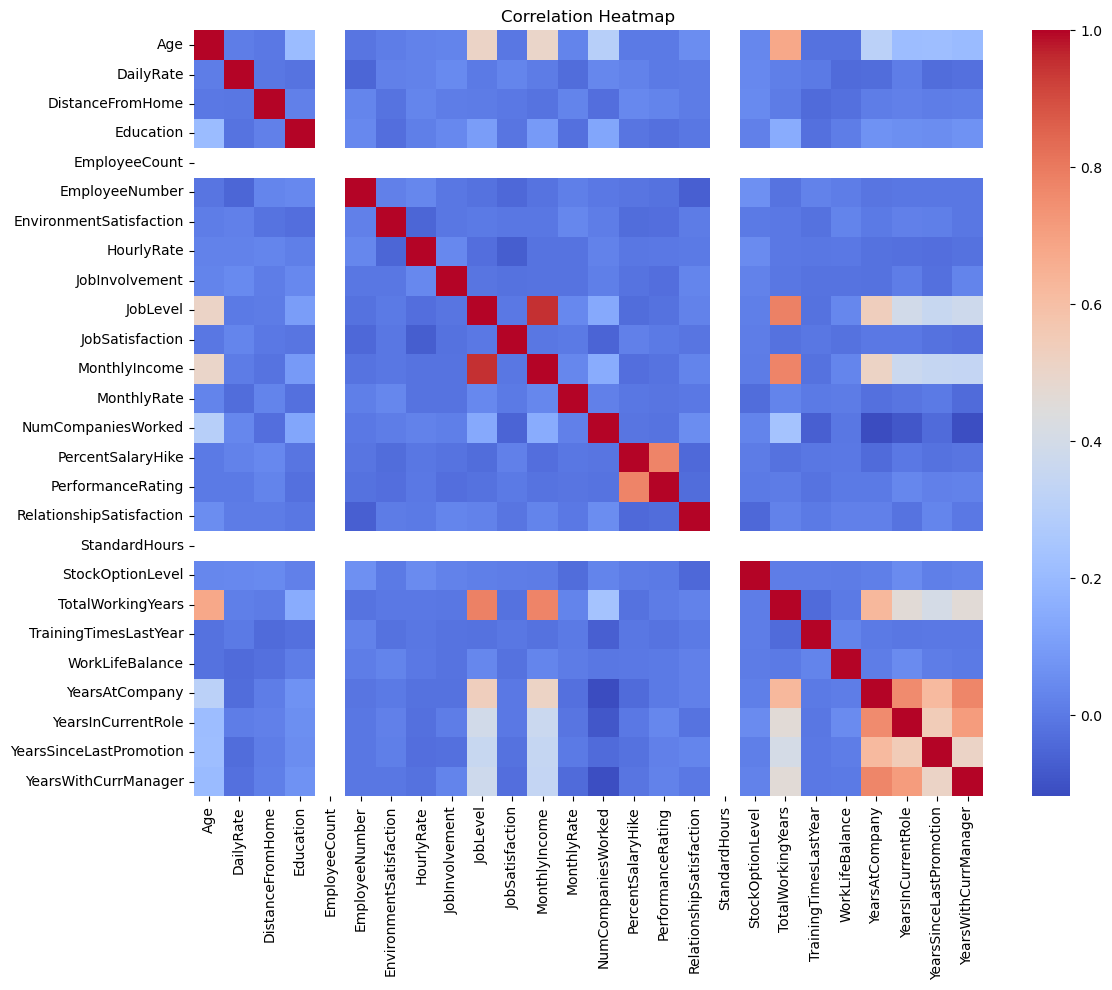

In [6]:
# Correlation Heatmap
plt.figure(figsize=(12,10))
sns.heatmap(df.select_dtypes(include=['int64', 'float64']).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

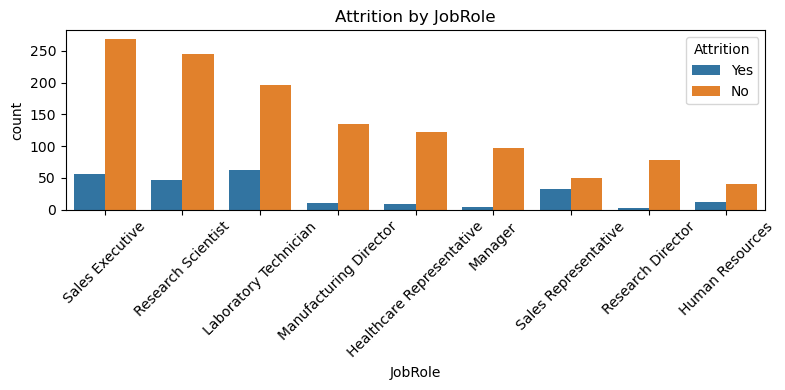

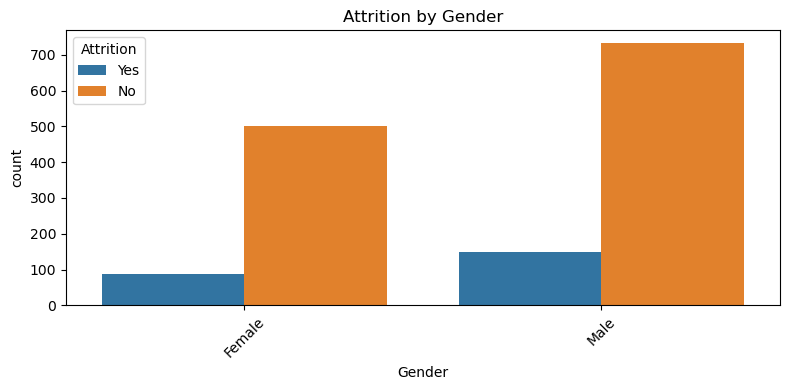

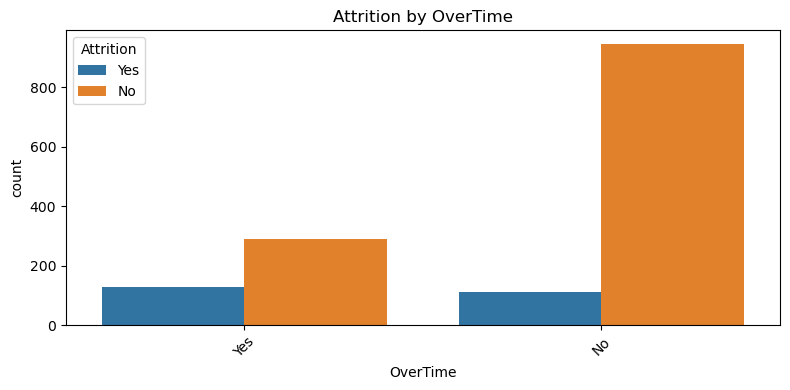

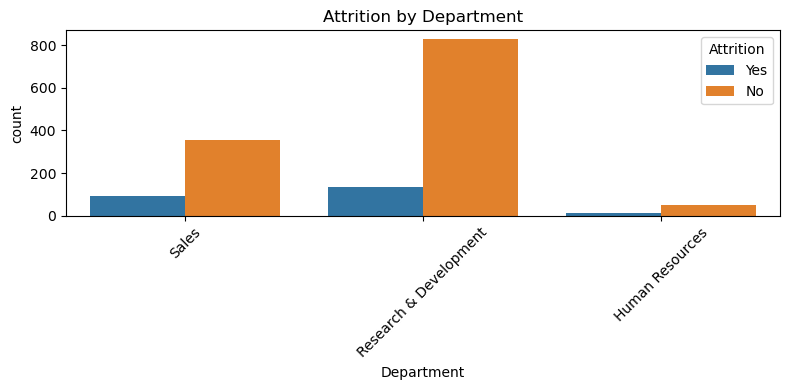

In [9]:
# Categorical Distribution: Attrition vs Key Features
cat_features = ['JobRole', 'Gender', 'OverTime', 'Department']
for feature in cat_features:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.title(f"Attrition by {feature}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

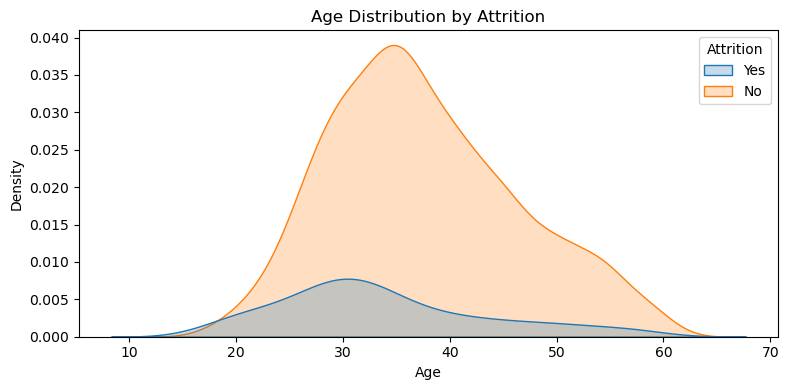

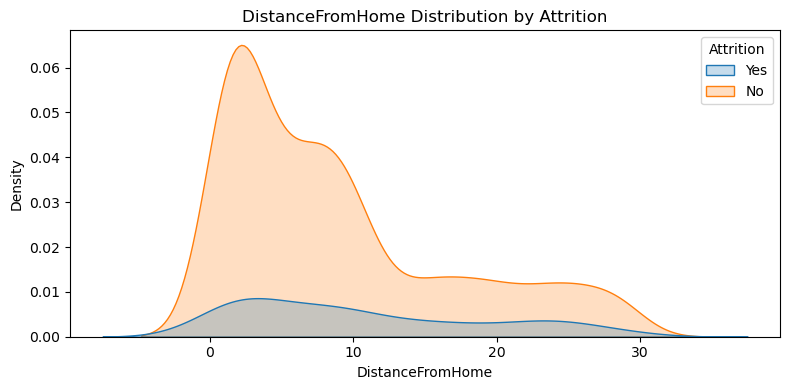

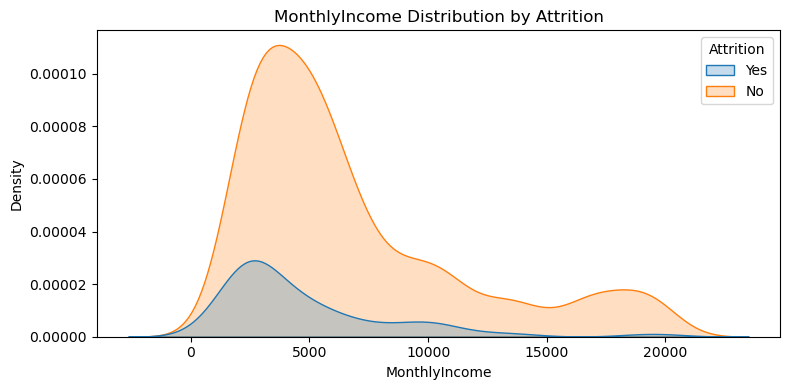

In [10]:
# Numerical Insights: Age, DistanceFromHome, MonthlyIncome
num_features = ['Age', 'DistanceFromHome', 'MonthlyIncome']
for feature in num_features:
    plt.figure(figsize=(8,4))
    sns.kdeplot(data=df, x=feature, hue='Attrition', fill=True)
    plt.title(f"{feature} Distribution by Attrition")
    plt.tight_layout()
    plt.show()

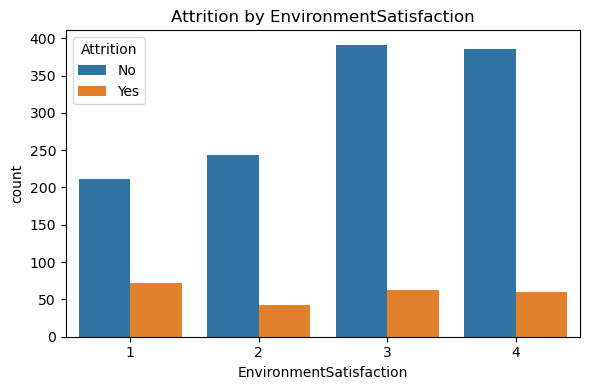

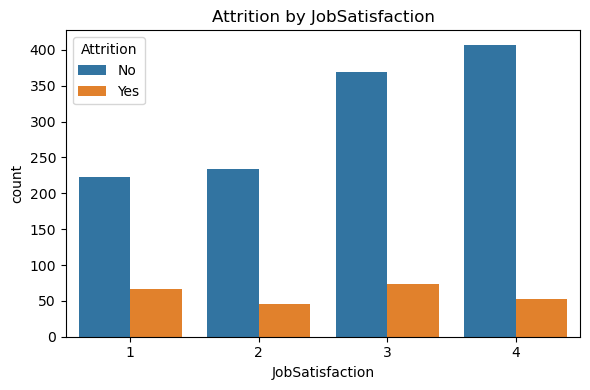

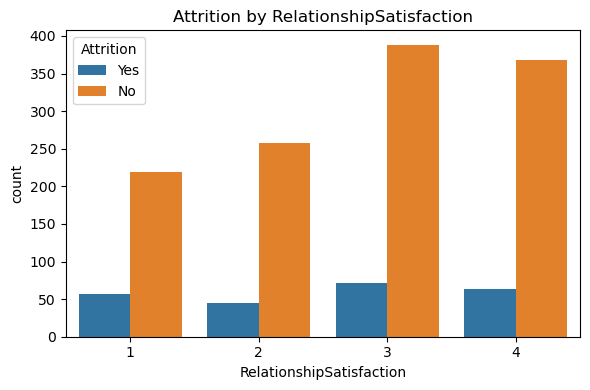

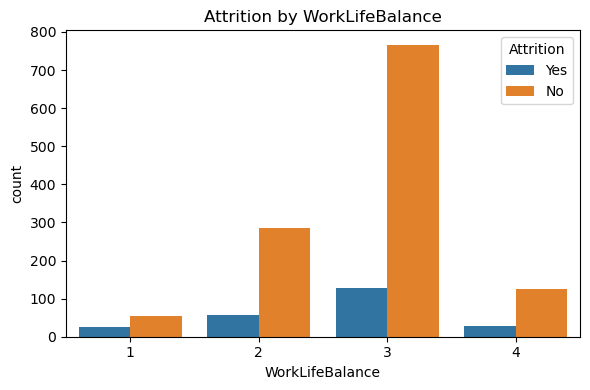

In [11]:
# Satisfaction Scores
satisfaction = ['EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'WorkLifeBalance']
for feature in satisfaction:
    plt.figure(figsize=(6,4))
    sns.countplot(data=df, x=feature, hue='Attrition')
    plt.title(f"Attrition by {feature}")
    plt.tight_layout()
    plt.show()